# RBM models
An example of a simple SEIR model written on kappa;

In [1]:
!cat ../cv19gm/models/kappa/SEIR-base.xka

%params:  'alfa','beta', 'N','E_0','I_0','R_0', 't_EI','t_IR','r_RS', 'S_f','E_f','I_f','R_f', 'k_I','k_R'

%param: 'alfa'	1.0
%param: 'beta'	0.2
%param: 'N'		100000
# %param: 'S_0'	
%param: 'E_0'	0
%param: 'I_0'	1
%param: 'R_0'	0
%param: 't_EI'	5
%param: 't_IR'	10
%param: 'r_RS'	0.0
%param: 'S_f'	0
%param: 'E_f'	0
%param: 'I_f'	0
%param: 'R_f'	0
%param: 'k_I'	1.0
%param: 'k_R'	1.0


%const: 'r_EI' 1.0/'t_EI'
%const: 'r_IR' 1.0/'t_IR'

#main agent person
%agent: P(s~S~E~I~R)

%token: new_E
%token: new_I
%token: new_R
%token: new_S

#rules
'expose' P(s~S),P(s~I) -> P(s~E),P(s~I) | 1: new_E @ 'beta'/'N'
'infect' P(s~E) -> P(s~I) | 1: new_I @ 'r_EI'
'remove' P(s~I) -> P(s~R) | 1: new_R @ 'r_IR'
'imm. loss' P(s~R) -> P(s~S) | 1: new_S @ 'r_RS'

#inits
%init: 'N'-'E_0'-'I_0'-'R_0' P(s~S)
%init: 'E_0' P(s~E)
%init: 'I_0' P(s~I)
%init: 'R_0' P(s~R)

%obs: 'Susceptible' P(s~S)
%obs: 'Exposed' P(s~E)
%obs: 'Infected' P(s~I)
%obs: 'Removed' P(s~R)


%obs: 'Daily Exposed' |new_E|
%obs: 'Daily Inf

### Pandemic-Suite
Using common configuration files for pandemic models, we can simulate similar models using ODEs or RBM aproach.

In [2]:
cfg = '../config_files/SEIR-by_age-vac2.toml'
!cat {cfg}

# Pandemic Suite Configuration File		

title = 'Example of a SEIR Configuration File'
date = '2021-04-20'
user = 'Samuel'

[model]
	name = "SEIR-byage-vac2"
	compartments  = ['S','E','I','R'] 
	

[data]
	# Real data will set initial conditions and will be available to be plotted and to calculate errors	
	datafile = false # File path for importing data from file 
	importdata = false # Import data from external source

	# parameters to use when importing from external sources 
	initdate = ''
	country = ''
	state = ''
	county = ''#'13101'
	healthservice = ''
	loc_name= '' # optional 


[parameters]
	[parameters.static]
	t_init = 0 # Initial day
	t_end = 500 # Final day
	timestep = 0.01 # Timestep for solver
	
	# Saturation dynamic
	k_I = 0
	k_R = 0

	seroprevfactor = 1 # Fraction of the total population that take part on the dynamic at the beginning
	expinfection = 0 # Factor in which exposed infect, default is 0

	mu = 0.5 # E(0) = mu*I(0)
	
	# Subreport
	pI_det = 1		
	
	[parameters.dyna

In [3]:
ls ../cv19gm/models

__init__.py  __pycache__/  seirhvd.py  seirtqm.py
kappa/       RBM_seir.py   seir.py     sir.py


In [5]:
import sys
#print(sys.path)
#sys.path.clear()
if('../cv19gm/models' not in sys.path):
    sys.path.append('../cv19gm/models')
import RBM_seir

sys.path.append('../lib')

model = RBM_seir.RBM_SEIR(cfg)
result = model.kappa_sim(True)
#model.integrate()
result

{'-i': '../cv19gm/models/kappa/SEIR-by_age-vac2.xka', '-r': '10', '-t': '500', '-p': '500', '--verbose': '0', '--params': '1 0.2 100000 50.0 100 0 5.0 10.0 0'}


In [6]:
result.collectHistogram()
avg_df = result.getAvgTrajectory().asDataFrame()
print(result.listTabs())
avg_df

Average Trajectory
Sim[0] - Histogram of R0 (15 < age < 45)
Sim[0] - Histogram of R0 (45 < age)
Sim[0] - Histogram of R0 (age < 15)
Sim[0] - Trajectory
Sim[1] - Histogram of R0 (15 < age < 45)
Sim[1] - Histogram of R0 (45 < age)
Sim[1] - Histogram of R0 (age < 15)
Sim[1] - Trajectory
Sim[2] - Histogram of R0 (15 < age < 45)
Sim[2] - Histogram of R0 (45 < age)
Sim[2] - Histogram of R0 (age < 15)
Sim[2] - Trajectory
Sim[3] - Histogram of R0 (15 < age < 45)
Sim[3] - Histogram of R0 (45 < age)
Sim[3] - Histogram of R0 (age < 15)
Sim[3] - Trajectory
Sim[4] - Histogram of R0 (15 < age < 45)
Sim[4] - Histogram of R0 (45 < age)
Sim[4] - Histogram of R0 (age < 15)
Sim[4] - Trajectory
Sim[5] - Histogram of R0 (15 < age < 45)
Sim[5] - Histogram of R0 (45 < age)
Sim[5] - Histogram of R0 (age < 15)
Sim[5] - Trajectory
Sim[6] - Histogram of R0 (15 < age < 45)
Sim[6] - Histogram of R0 (45 < age)
Sim[6] - Histogram of R0 (age < 15)
Sim[6] - Trajectory
Sim[7] - Histogram of R0 (15 < age < 45)
Sim[7] - 

,Susceptible,Exposed,Infected,Removed,Vacc,Daily Exposed,Daily Infected,Daily Removed,Daily Inmunized,Daily Vaccinated
0.0,99850.0,50.0,100.0,0.0,100000.0,0.0,0.0,0.0,0.0,0.0
1.0,99825.5,63.3,101.5,9.7,99487.2,24.5,11.2,9.7,0.0,512.8
2.0,99800.8,75.8,104.6,18.8,98983.4,24.7,12.2,9.1,0.0,503.3
3.0,99774.6,83.7,112.4,29.3,98465.4,26.2,18.3,10.5,0.0,517.6
4.0,99743.0,97.8,118.0,41.2,97952.4,31.6,17.5,11.9,0.0,512.2
...,...,...,...,...,...,...,...,...,...,...
496.0,61942.2,0.0,0.0,38057.8,0.0,0.0,0.0,0.0,0.0,0.0
497.0,61942.2,0.0,0.0,38057.8,0.0,0.0,0.0,0.0,0.0,0.0
498.0,61942.2,0.0,0.0,38057.8,0.0,0.0,0.0,0.0,0.0,0.0
499.0,61942.2,0.0,0.0,38057.8,0.0,0.0,0.0,0.0,0.0,0.0


,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000,17.000000,Average
inf,6424.0,3525.0,1881.0,1038.0,635.0,338.0,181.0,99.0,65.0,32.0,20.0,15.0,7.0,6.0,3.0,4.0,1.0,1.251506


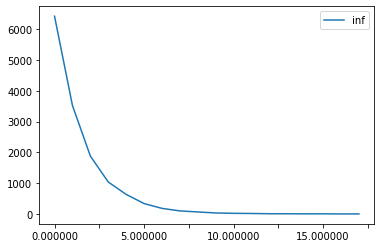

In [8]:
hist_df = result.getTab('Sim[5] - Histogram of R0 (15 < age < 45)',0).asDataFrame()
hist_df.T.plot()
hist_df

In [9]:
sim_hists = []
sim_hists.append(result.getTab('Sim[5] - Histogram of R0 (age < 15)',0).asDataFrame())
sim_hists.append(result.getTab('Sim[5] - Histogram of R0 (15 < age < 45)',0).asDataFrame())
sim_hists.append(result.getTab('Sim[5] - Histogram of R0 (45 < age)',0).asDataFrame())
for hist in sim_hists:
    print(hist['Average'].values)

[0.87519633]
[1.25150624]
[0.86528107]
